<b>【Pythonサンプルコード】KerasでCNN機械学習。自作・自前画像のオリジナルデータセットで画像認識入門</b><br>
オリジナルデータセットを使えるようになると、面白いですね。<br><br>
<b>【情報】</b><br>
このノートブックのコードで作成した学習済みモデルを使い、Flaskで機械学習Webアプリを作成できるサンプルコードとコード解説を公開しました。<br>
サンプルコードの解説記事：<br>
[【コード解説】自作画像認識編 Flask（Python）Web機械学習アプリ開発入門：画像アップロード判定プログラム | 子供プログラマー](https://child-programmer.com/ai/flask/keras-simple-original-samplecode-description/)
<br><br>
その他にも、今回のコードを改変して7セグメントのデジタル数字画像認識に挑戦<br>
：[【4桁 – 7セグメント編】連続デジタル数字画像認識プログラミング入門（Python・OpenCV・Keras・CNN）| 子供プログラマー](https://child-programmer.com/seven-segment-digits-ocr-beginner/)
<br><br>
や、日本語OCRにも挑戦できます。<br>
：[【日本語手書きOCR編】連続文字画像認識プログラミング入門（Python・OpenCV・Keras・CNN）| 子供プログラマー](https://child-programmer.com/japanese-handwritten-text-ocr-beginner/)
<br>
<br><br><br>
今回のサンプルコードを理解するために必要な画像認識関連の深層学習プログラミングの知識を学ぶ上で補助教材となりそうな書籍をレビューしておきました。日々の学習の一助になることがありましたら幸いです。
<br>
：<a href="https://child-programmer.com/ai-book-review/">【1周目 - 学習レビュー】Pythonで動かして学ぶ！あたらしい深層学習の教科書 機械学習の基本から深層学習まで（Aidemy公式教科書）by 子供プログラマー</a><br><br>
上記の書籍を読むために必要そうな数式関連の情報をまとめておきました。日々の学習にお役立てください。<br>
：[「Pythonで動かして学ぶ！あたらしい深層学習の教科書 機械学習の基本から深層学習まで」を読むためのギリシャ文字・数学記号 by 子供プログラマー](https://child-programmer.com/ml-book-engineer-math/)
<br><br>
<b>【変更情報：2021年6月7日】</b><br>
ColaboratoryのKerasなどのバージョン変更の影響で、「from keras.utils 」系のコードが使えないようでしたので修正しておきました。 <br>
コメントで教えてくださった方は、ありがとうございました。
<br><br>
<b>【変更情報：2021年9月6日】</b><br>
③のコード内の「#1 各種インポート」の<br>
<b>from keras.optimizers import Adam</b><br>
でエラーとなるため修正しておきました。<br>
不具合を教えてくださった方、ありがとうございました。
<br><br>


プログラムを実行する際は、Googleアカウントにログインした状態で、「ファイル - ドライブにコピーを保存」をした環境で実行できます。

① zipファイルをGoogle Colaboratoryにアップロードし、フォルダ化
<br>
<br>
サンプルデータセット（○×判定）も無料ダウンロードできます。<br>
[dataset by 子供プログラマー](https://child-programmer.com/download/dataset/)
<br><br>


In [ ]:
!unzip dataset.zip #解凍：ここを変更。「dataset」のところをアップロードしたzipファイル名に変更してください。- ファイルを消す場合「!rm dataset.zip」

Archive:  dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/cross/
   creating: dataset/circle/
  inflating: dataset/cross/8.png     
  inflating: __MACOSX/dataset/cross/._8.png  
  inflating: dataset/cross/9.png     
  inflating: __MACOSX/dataset/cross/._9.png  
  inflating: dataset/cross/14.png    
  inflating: __MACOSX/dataset/cross/._14.png  
  inflating: dataset/cross/15.png    
  inflating: __MACOSX/dataset/cross/._15.png  
  inflating: dataset/cross/17.png    
  inflating: __MACOSX/dataset/cross/._17.png  
  inflating: dataset/cross/16.png    
  inflating: __MACOSX/dataset/cross/._16.png  
  inflating: dataset/cross/12.png    
  inflating: __MACOSX/dataset/cross/._12.png  
  inflating: dataset/cross/13.png    
  inflating: __MACOSX/dataset/cross/._13.png  
  inflating: dataset/cross/11.png    
  inflating: __MACOSX/dataset/cross/._11.png  
  inflating: dat

② 用意した自前画像で学習（畳み込みニューラルネットワーク：CNN）<br>
このプログラムでは、「判別したい "ラベル情報（フォルダ名）" と "画像" をセットにしたフォルダ」をアップロードすると動くようにしてあります。<br>
<br>
今回のプログラムを動かすために必要なデータセットの構造例（機械学習用データセットの作り方）<br>

<b>dataset</b>（フォルダ名）<br>
-- <b>circle</b>（datasetフォルダ内のフォルダ名 - ラベル情報）<br>
-- <b>cross</b>（datasetフォルダ内のフォルダ名 - ラベル情報）<br>

＊　データセットの作り方は簡単です。「circle」「cross」の各フォルダ内に、対応する画像を配置するだけです。<br>
　　画像の大きさは、特に指定はありません。バラバラの大きさでも実行できるようですが、必要に応じて調整してみてください。

今回のデータで分類するクラス数は「 2 」です。
--- 読み込んだデータセットは dataset/circle です。
--- 読み込んだデータセットは dataset/cross です。
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       18560     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 256)         0         
__________________________

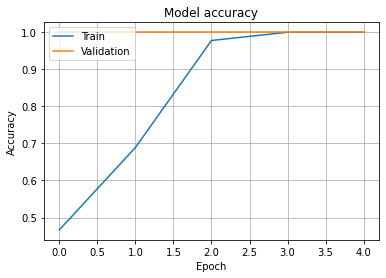

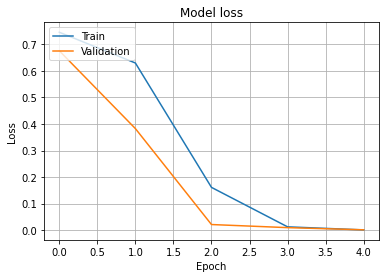

Loss: 0.001292205648496747 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 100.0 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:8.662 sec（秒）


In [ ]:
#1 ライブラリのインポート等

import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import plot_model #これはKerasのバージョンなどにより使えないのでコメントアウト
from keras.utils import np_utils #keras.utils.to_categoricalでエラーが出るので追加
# from keras.optimizers import Adam # ここでエラーとなるので以下のコードに変更
from tensorflow.keras.optimizers import Adam # 「tensorflow.」を追加
import matplotlib.pyplot as plt
import time


#2 各種設定 

train_data_path = 'dataset' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力

image_size = 28 # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。

color_setting = 1  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。

folder = ['circle', 'cross'] # ここを変更。データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')


#3 データセットの読み込みとデータ形式の設定・正規化・分割 

X_image = []  
Y_label = [] 
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.png') #ここを変更。png形式のファイルを利用する場合のサンプルです。
  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
#Y_label = keras.utils.to_categorical(Y_label, class_number) #Kerasのバージョンなどにより使えないのでコメントアウト
Y_label = np_utils.to_categorical(Y_label, class_number) #上記のコードのかわり

train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.10)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels


#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png') #ここはKerasのバージョンなどにより使えないのでコメントアウト

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

# ここを変更。必要に応じて「batch_size=」「epochs=」の数字を変更してみてください。
history = model.fit(x_train,y_train, batch_size=2, epochs=5, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

open('cnn_model.json',"w").write(model.to_json())
model.save_weights('cnn_weights.h5')
#model.save('cnn_model_weight.h5')  #モデル構造と重みを1つにまとめることもできます

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))

③ 自前画像で判定（○×判定等）<br>
実行前に認識したい画像ファイルを1つアップロードしてください。

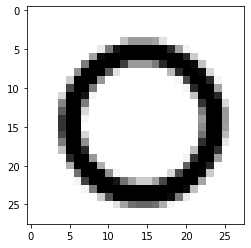

1/1 [==============================] - 0s 78ms/step
画像認識AIは「 ○：丸 」の確率を 100 % と予測しました。
画像認識AIは「 ×：バツ 」の確率を 0 % と予測しました。
-------------------------------------------------------
画像認識AI：○ or × の予測結果は、「 ○：丸 」です。


In [ ]:
#1 ライブラリのインポート等

import cv2 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
from keras.models import load_model #from keras.models import load_model #model = load_model('cnn_model_weight.h5') #model.save('cnn_model_weight.h5') で保存したファイルを読み込む場合に使用

#2 各種設定

recognise_image = '1.png' #ここを変更。画像認識したい画像ファイル名。（実行前に認識したい画像ファイルを1つアップロードしてください）

folder = ['○：丸', '×：バツ']  #ここを変更。今回は日本語の表示にしたかったので、folder = ['circle', 'cross'] の順番で日本語にしています。

image_size = 28 # ここを変更。「28」を指定した場合、縦28横28ピクセルの画像に変換
                # 「② 用意した自前画像で学習」と同じにする。

color_setting = 1  # ここを変更。画像認識する画像のカラー。「1」はモノクロ・グレースケール。「3」はカラー
                   # 「② 用意した自前画像で学習」と同じにする。

#3 各種読み込み
model = model_from_json(open('cnn_model.json', 'r').read())
model.load_weights('cnn_weights.h5')
#model = load_model('cnn_model_weight.h5')   #model.save('cnn_model_weight.h5') で保存したファイルを読み込む場合に使用

#4 画像の表示・各種設定等
img = cv2.imread(recognise_image, 0)  #ここを変更。モノクロ・グレースケールの場合は「0」。カラーの場合は「1」 。         
img = cv2.resize(img, (image_size, image_size))
plt.imshow(img)
plt.gray()  #ここを変更。カラーの場合は「plt.gray()」を消す。モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります。
plt.show()

img = img.reshape(image_size, image_size, color_setting).astype('float32')/255 

#5 予測と結果の表示等
prediction = model.predict(np.array([img]), batch_size=2, verbose=1)
result = prediction[0]

for i, accuracy in enumerate(result):
  print('画像認識AIは「', folder[i], '」の確率を', int(accuracy * 100), '% と予測しました。')

print('-------------------------------------------------------')
print('画像認識AI：○ or × の予測結果は、「', folder[result.argmax()],'」です。')

In [ ]:
print('【ローカル環境で再現したい方用の情報】')
print('上記の学習済みモデル作成プログラムのライブラリなどのバージョン')
print('（実行時点のバージョンです）')

import platform
print('python ' + platform.python_version())

import tensorflow as tf
print('tensoflow ' + tf.__version__)

import keras
print('keras ' + keras.__version__)

import sklearn
print('sklearn（scikit-learn） ' + sklearn.__version__)

import cv2
print('opencv（opencv-python）' +  cv2.__version__)

import matplotlib
print('matplotlib ' + matplotlib.__version__)

print('\n指定したバージョンのインストールが難しい場合、Python・TensorFlow・Keras以外は最新のバージョンを入れてみてください')

【ローカル環境で再現したい方用の情報】
上記の学習済みモデル作成プログラムのライブラリなどのバージョン
（実行時点のバージョンです）
python 3.7.11
tensoflow 2.6.0
keras 2.6.0
sklearn（scikit-learn） 0.22.2.post1
opencv（opencv-python）4.1.2
matplotlib 3.2.2

指定したバージョンのインストールが難しい場合、Python・TensorFlow・Keras以外は最新のバージョンを入れてみてください


<br><br><b>【最終更新】</b>2021年9月6日<br><br>
記事ページ：<br>
【サンプルコード】Python・KerasでCNN機械学習。自作・自前画像のオリジナルデータセットで画像認識入門 by 子供プログラマー<br>
https://child-programmer.com/ai/cnn-originaldataset-samplecode/
<br>
<br>
コードの解説も公開しました。印刷用のPDFも公開中です。
<br>
：【コード解説】自作画像認識AI：Keras・CNN・Pythonオリジナルデータセット対応の機械学習サンプルコード by 子供プログラマー<br>
https://child-programmer.com/ai/cnn-originaldataset-samplecode-description/
<br>
<br>
日本人のための人工知能プログラマー入門講座（機械学習）by 子供プログラマー<br>
https://child-programmer.com/ai/